In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import utils

In [76]:
import matplotlib.pylab as pylab

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 5),
          'axes.labelsize': 'x-large',
          'axes.titlesize': 'xx-large',
          'xtick.labelsize': 'large',
          'ytick.labelsize': 'medium'}
pylab.rcParams.update(params)

In [136]:
file_name = './data/walks_0-1_s200000.h5'
df = pd.read_hdf(file_name, 'table')
#df2 = pd.read_csv(file_path.replace('walkData', 'timeStats'))
#df3 = pd.read_csv(file_path.replace('walkData', 'distinctSitesStats'))


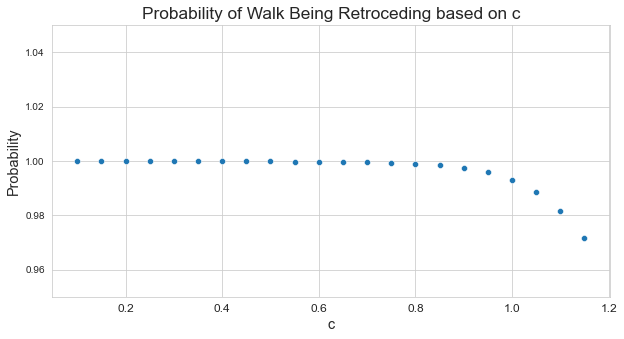

In [139]:
# Calculate the probability of the walk being retroceding based on the value of c
prob_retroceding = df.groupby('c')['is_retroceding'].mean()

# Create a bar plot to visualize the probabilities
sns.scatterplot(x=prob_retroceding.index, y=prob_retroceding.values)
plt.xlabel('c')
plt.ylabel('Probability')
plt.ylim([0.95,1.05])
plt.title('Probability of Walk Being Retroceding based on c')
plt.show()

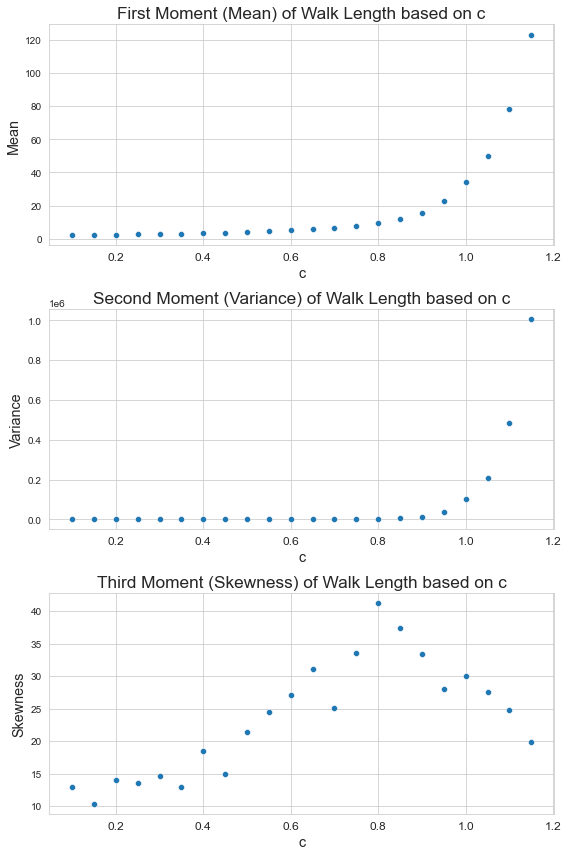

In [140]:
# Calculate the first, second, and third moments of walk_length based on the value of c
moments = df.groupby('c')['walk_length'].agg(['mean', 'var', 'skew'])

# Create subplots for each moment
fig, axes = plt.subplots(nrows=3, figsize=(8, 12))

# Plot first moment (mean)
sns.scatterplot(x=moments.index, y=moments['mean'], ax=axes[0])
axes[0].set_xlabel('c')
axes[0].set_ylabel('Mean')
axes[0].set_title('First Moment (Mean) of Walk Length based on c')

# Plot second moment (variance)
sns.scatterplot(x=moments.index, y=moments['var'], ax=axes[1])
axes[1].set_xlabel('c')
axes[1].set_ylabel('Variance')
axes[1].set_title('Second Moment (Variance) of Walk Length based on c')

# Plot third moment (skewness)
sns.scatterplot(x=moments.index, y=moments['skew'], ax=axes[2])
axes[2].set_xlabel('c')
axes[2].set_ylabel('Skewness')
axes[2].set_title('Third Moment (Skewness) of Walk Length based on c')

plt.tight_layout()
plt.show()

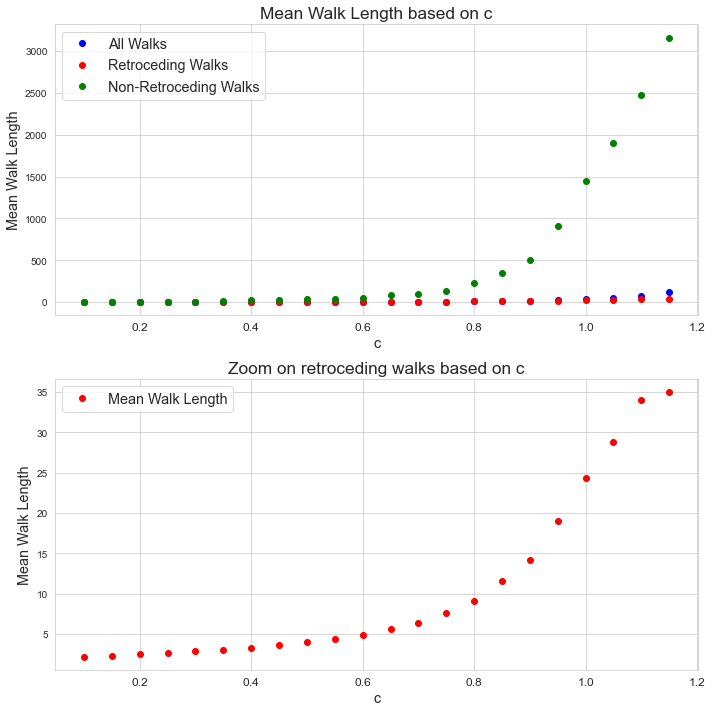

In [141]:
# Calculate the mean for all walks
mean_all = df.groupby('c')['walk_length'].mean()

# Calculate the mean for retroceding walks
mean_by_retroceding = df.groupby(['c', 'is_retroceding'])['walk_length'].mean().reset_index()
# Calculate the mean for non-retroceding walks
mean_retroceding = mean_by_retroceding[mean_by_retroceding['is_retroceding']]
mean_non_retroceding = mean_by_retroceding[~mean_by_retroceding['is_retroceding']]
# mean_non_retroceding = df[~df['is_retroceding']]['walk_length'].groupby(df['c']).mean()

# Create the scatterplot
plt.figure(figsize=(10, 10))
plt.subplot(211)
plt.plot(mean_all.index, mean_all.values, 'bo', label='All Walks')
plt.plot(mean_retroceding['c'], mean_retroceding['walk_length'], 'ro', label='Retroceding Walks')
plt.plot(mean_non_retroceding['c'], mean_non_retroceding['walk_length'], 'go', label='Non-Retroceding Walks')
# Set plot labels and title
plt.xlabel('c')
plt.ylabel('Mean Walk Length')
plt.title('Mean Walk Length based on c')
plt.legend()

plt.subplot(212)
plt.plot(mean_retroceding['c'], mean_retroceding['walk_length'], 'ro', label='Mean Walk Length')
# plt.plot(mean_retroceding.index, mean_distinct_sites.values, 'cd', label='Mean Distinct Sites')
# Set plot labels and title
plt.xlabel('c')
plt.ylabel('Mean Walk Length')
plt.title('Zoom on retroceding walks based on c')
plt.legend()

# Show the legend
plt.tight_layout()
plt.show()

In [128]:
mean_by_retroceding

,c,is_retroceding,walk_length
0,0.1,False,11.000000
1,0.1,True,2.218021
2,0.2,False,3.000000
3,0.2,True,2.495992
4,0.3,False,22.200000
5,0.3,True,2.840851
6,0.4,False,14.153846
7,0.4,True,3.324386
8,0.5,False,23.677419
9,0.5,True,3.953803


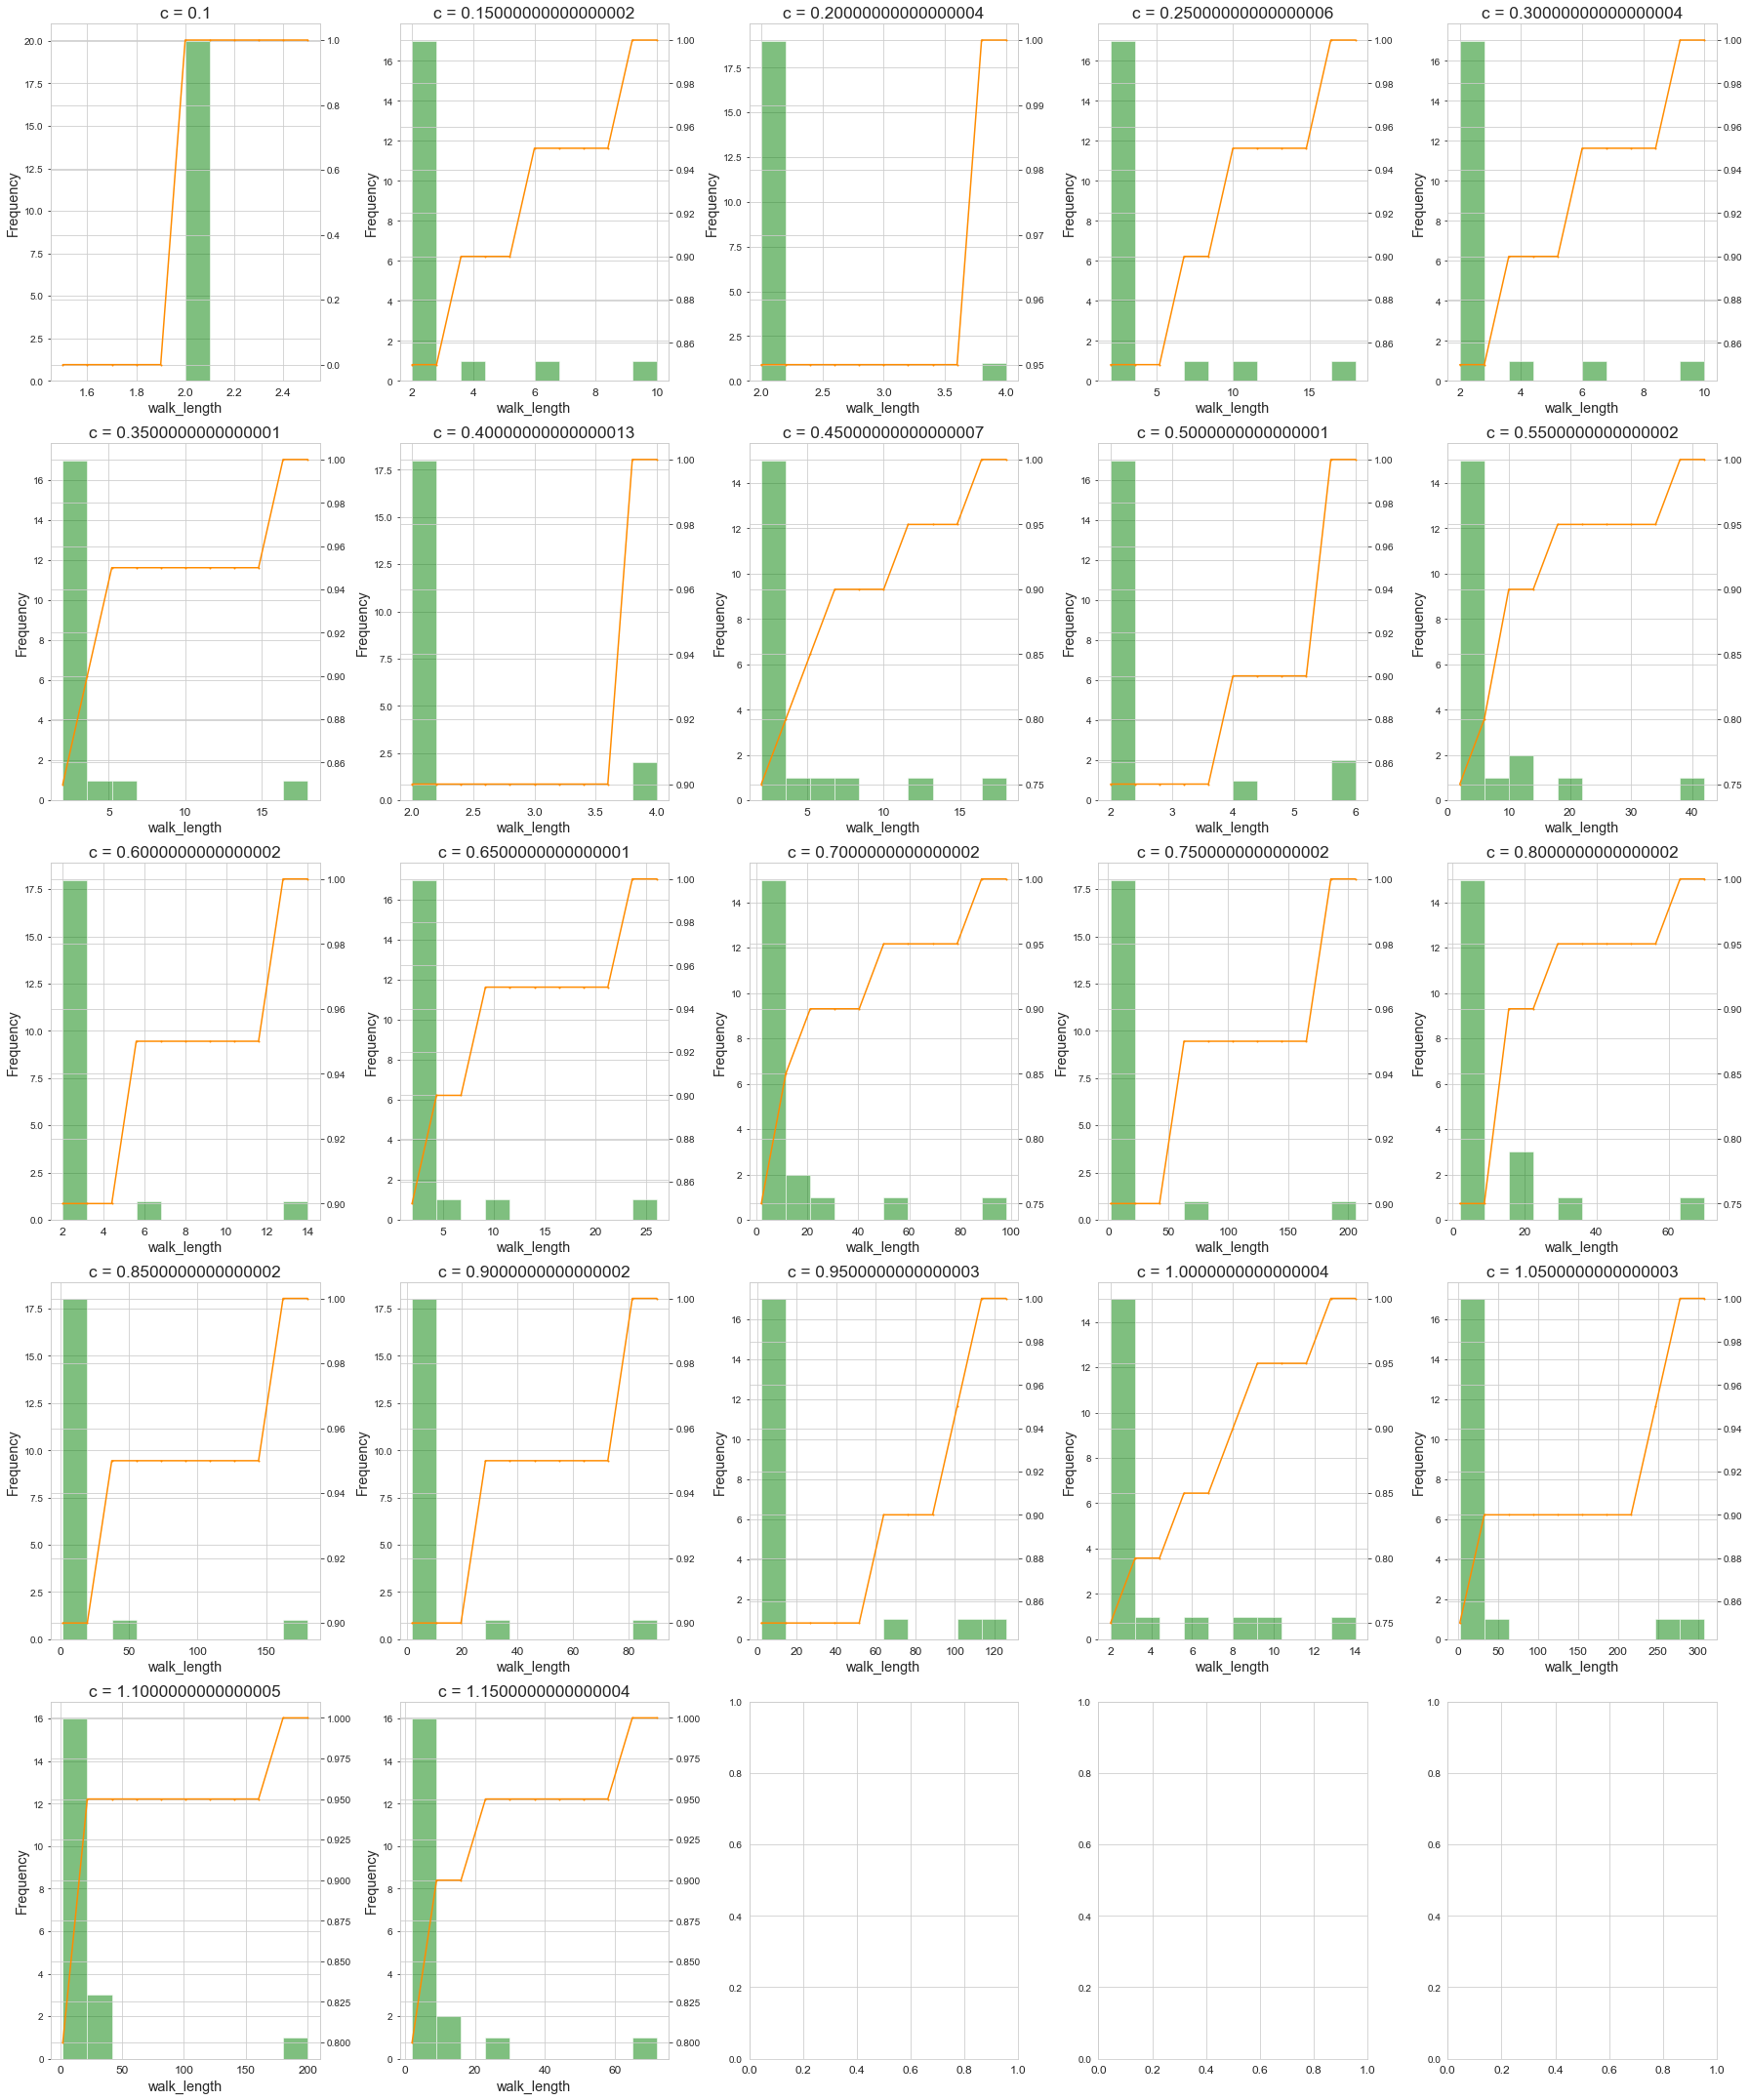

In [101]:
# Reshape the c values into a 5x4 grid
c_values = df['c'].unique()
num_cols = 5
num_rows = len(c_values) // num_cols + int(len(c_values) % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 30))

for i, c in enumerate(c_values):
    ax = axes[i // num_cols, i % num_cols]

    # Filter the DataFrame for the current c value
    filtered_df = df[df['c'] == c]

    # Plot the distribution of walk_length for the current c value
    ax.set_title(f'c = {c}')
    ax.set_xlabel('walk_length')
    ax.set_ylabel('Frequency')

    values, base, _ = ax.hist(filtered_df['walk_length'], bins=10, alpha=0.5, color="green")
    values = np.append(values, 0)
    ax_bis = ax.twinx()
    ax_bis.plot(base, np.cumsum(values) / np.cumsum(values)[-1], color='darkorange', marker='o', linestyle='-',
                markersize=1)

plt.tight_layout()
plt.show()

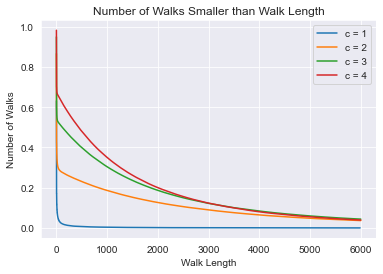

In [45]:
# Group the DataFrame by 'c'
grouped_df = df.groupby('c')

# Iterate over each group
for c_value, group in grouped_df:
   # if c_value not in [3,4,10]:
   #     continue
    # Calculate the number of walks smaller than walk length for each value of 'walk_length'
    walks_smaller_than_length = group['walk_length'].value_counts().sort_index().cumsum()
    walks_smaller_than_length = 1 - walks_smaller_than_length / max(walks_smaller_than_length)
    walks_smaller_than_length = walks_smaller_than_length[walks_smaller_than_length.index < 6000]

    # Plot the data
    plt.plot(walks_smaller_than_length.index, walks_smaller_than_length.values, label=f'c = {c_value}')

#walks_smaller_than_length
# Set the plot title and labels
plt.title('Number of Walks Smaller than Walk Length')
plt.xlabel('Walk Length')
plt.ylabel('Number of Walks')

#Show the legend
plt.legend()

# Display the plot
plt.show()

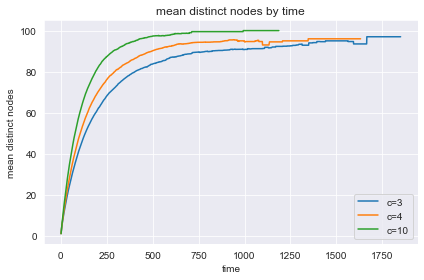

In [18]:
# Reshape the c values into a 5x4 grid
c_values = df['c'].unique()
num_rows = 5
num_cols = 4


for i, c in enumerate(c_values):
    if c not in [3,4,10]:
        continue
    # Filter the DataFrame for the current c value
    filtered_df = df2[df2['c'] == c]
    plt.plot(filtered_df['time'], filtered_df['mean_distinct_nodes'], label=f'c={c}')

plt.title(f'mean distinct nodes by time')
plt.xlabel('time')
plt.ylabel('mean distinct nodes')
plt.legend()
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


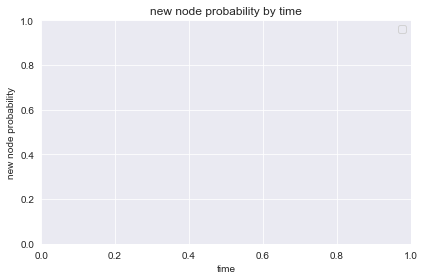

In [28]:
# Reshape the c values into a 5x4 grid
c_values = df['c'].unique()
num_rows = 5
num_cols = 4


for i, c in enumerate(c_values):
    if c not in [3,4,10]:
        continue
    # Filter the DataFrame for the current c value
    filtered_df = df2[df2['c'] == c]
    plt.plot(filtered_df['time'], filtered_df['new_node_probability'], label=f'c={c}')

plt.title(f'new node probability by time')
plt.xlabel('time')
plt.ylabel('new node probability')
plt.legend()
plt.tight_layout()
plt.show()

In [102]:
df

,walk_length,distinct_sites,is_retroceding,start_node_degree,component_size,c
0,2,2,True,1,2,0.10
1,2,2,True,1,2,0.10
2,2,2,True,1,2,0.10
3,2,2,True,1,2,0.10
4,2,2,True,2,3,0.10
...,...,...,...,...,...,...
15,2,2,True,2,7,1.15
16,2,2,True,1,5,1.15
17,2,2,True,2,317,1.15
18,2,2,True,1,2,1.15


In [9]:
df3 = df[df['c'] == 3]
df3

,Unnamed: 0,walk_length,in_giant_component,started_in_2core,distinct_sites,is_retroceding,c,g_id
1000000,1000000,2,False,False,2,True,3,0
1000001,1000001,636,True,True,296,False,3,0
1000002,1000002,2,True,True,2,True,3,0
1000003,1000003,1068,True,True,413,False,3,0
1000004,1000004,250,True,True,132,False,3,0
...,...,...,...,...,...,...,...,...
1499995,1499995,2,False,False,2,True,3,49
1499996,1499996,2,True,True,2,True,3,49
1499997,1499997,1851,True,True,552,False,3,49
1499998,1499998,10,True,True,5,True,3,49


In [23]:
import utils
s = 20
x,y=utils.full_histogram(df3['walk_length'])
list(y)[:s]

[0.050656,
 0.299972,
 0.000362,
 0.053742,
 0.00033,
 0.023846,
 0.000342,
 0.012876,
 0.00028,
 0.007644,
 0.000304,
 0.00492,
 0.000316,
 0.003394,
 0.000322,
 0.002598,
 0.000314,
 0.001844,
 0.00031,
 0.001598]